In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/DataMining/lab11'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
#Read Housing Dataset
# Linear Regression Refer https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# for more details. Loading housing dataset in to a dataframe. This dataset has 14 features with 506samples. MEDV is
# the target variable

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
'''
Read Linear Regression Assumptions
https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
'''

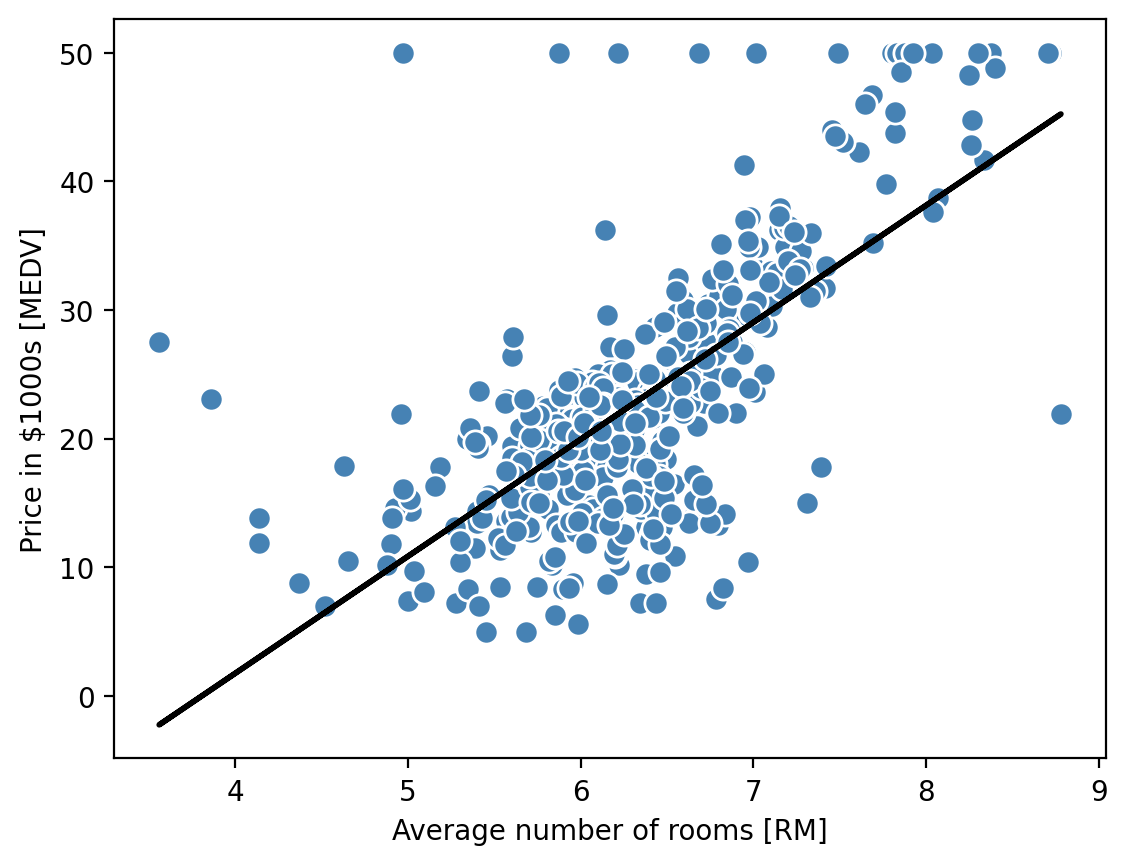

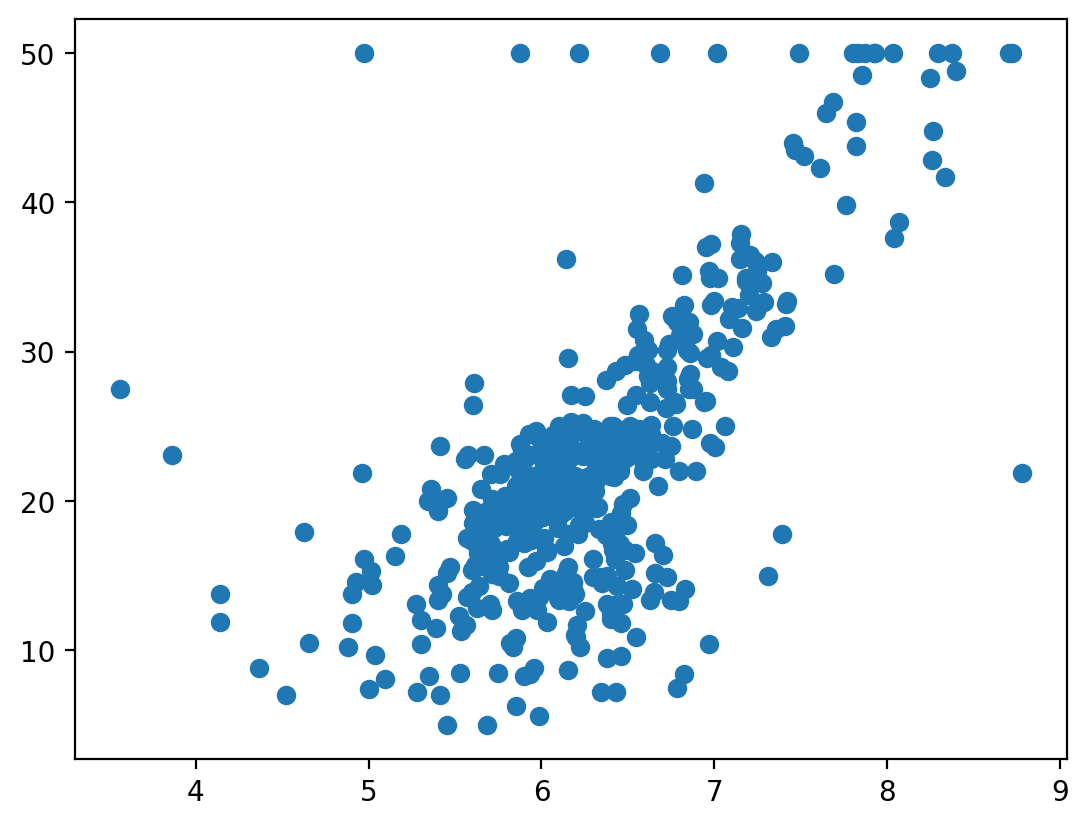

In [12]:
# Let's use the RM (number of rooms) variable from the Housing dataset as the
# explanatory variable and train a model that can predict MEDV (house prices).
# We only use one feature here, just to explain the concepts and applicability of the model.

X = df[['RM']].values
y = df['MEDV'].values

# Applying Sklearn linear regression model
slr = LinearRegression()
slr.fit(X, y)
#print('Slope: %.3f' % slr.coef_[0])
#print('Intercept: %.3f' % slr.intercept_)


# A function that will plot a scatterplot of the training samples and add the regression line
def lin_reg_plot2(X, y, model):
    plt.scatter(X, y,  )
    plt.show()

def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    plt.xlabel('Average number of rooms [RM]')
    plt.ylabel('Price in $1000s [MEDV]')
    plt.show()

# Plotting MEDV against RM by calling the lin_regplot function
lin_reg_plot(X, y, slr)
lin_reg_plot2(X, y, slr)

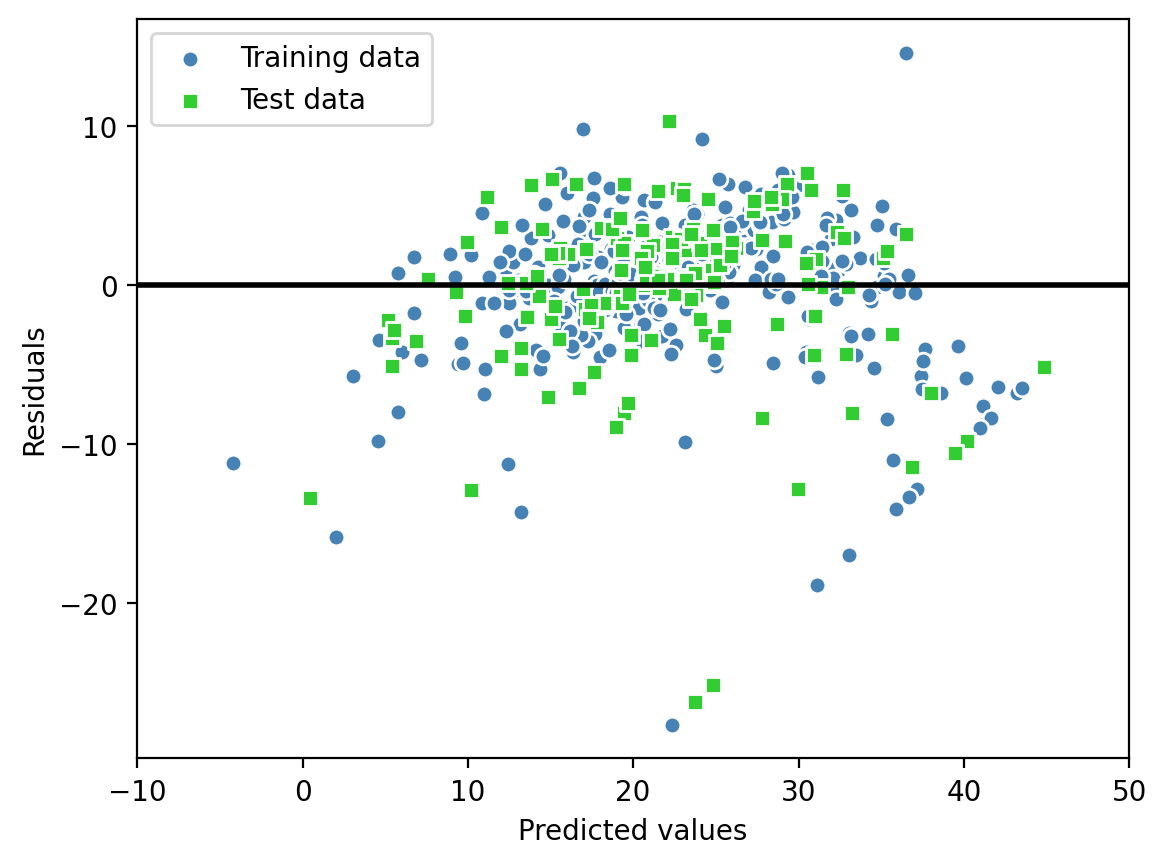

MSE train: 19.958, test: 27.196


In [13]:
#Part I Train and Test
# Now we use same housing dataset to do the actually implement the model, using training
# and testing sets.
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Since our model uses multiple explanatory variables, we can't visualize the linear
# regression line (or hyperplane to be precise) in a two-dimensional plot, but we can plot
# the residuals (the differences or vertical distances between the actual and predicted
# values) versus the predicted values to diagnose our regression model.

plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o',
            edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s',
            edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

# Using MSE(Mean Square Error to measure the performance)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))
############################################################

# You can refer https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html to
# understand on Logistic Regression

In [14]:
Housing_df =df
nrow, ncol = Housing_df.shape
X = Housing_df.iloc[:, :ncol - 1]
y = Housing_df.iloc[:, -1]

In [15]:
# fit an intercept term
X_constant = sm.add_constant(X)
X.shape

(506, 13)

In [16]:
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 22 May 2024   Prob (F-statistic):          6.72e-135
Time:                        22:22:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#pip install fastai

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from fastai.tabular.core import add_datepart
from sklearn.linear_model import LinearRegression
import numpy as np

In [25]:
pd.options.mode.chained_assignment = None

data = pd.read_csv(path+"/TSLA.csv")
print('Number of rows and columns:', data.shape)
data.head(5)

# creating a separate dataset
new_data = data[['Date', 'Close']]

# new_data['Predictions'] = 0

"""
Let's say, today is
2021,09,30

and you want to predict the stock price of TESLA on 2022,01,01

so you know the value of : Open,High,Low,Adj Close,Volume ?
you can't know it, right?

So, it means you don't have applicable features.
The only feature you can use, is the timestamp.

Thus, we have to create some other features from the timestamp.
"""

add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  # elapsed will be the time stamp

"""
This creates features such as:

‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’,
‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

Note:Above code uses add_datepart from fastai library.
If you do not have it installed, use the command pip install fastai.

Apart from this, we can add our own set of features that we believe would be relevant for the predictions.
 For instance,  my hypothesis is that the first and last days of the week  could potentially affect the closing price of the stock
 far more than the other days.   So I have created a feature that identifies whether a given day is
 Monday/Friday/Tuesday/Wednesday/Thursday. This can be done using the following lines of code:


new_data['mon_fri'] = 0
for i in range(0, len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

"""

# split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

model = LinearRegression()
model.fit(x_train, y_train)

# make predictions and find the rmse
preds = model.predict(x_valid)
rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(preds)), 2)))
print(rms)


Number of rows and columns: (1259, 7)
64.54845611611573


/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)
